In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Goal is to make neural network to predict digits from images as good as possible.

In [3]:
data = pd.read_csv("MNIST_dataset/data.csv")

In [4]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
n, m = data.shape
np.random.shuffle(data)
print(f"Number of rows: {n}, Number of columns: {m}")

Number of rows: 42000, Number of columns: 785


In [6]:
data_val = data[0:1000].T # 1000 out of 42000 are validation examples
Y_val = data_val[0] # first row are labels (digits 0-9)
X_val = data_val[1:m] # pixes values 0-255
X_val = X_val / 255 # normalize values to [0,1]

data_train = data[1000:n].T
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255

In [9]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2 / 128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    shifted = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(shifted)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(x):
    return x > 0

def backward_propagation(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / Y.size * dZ2.dot(A1.T)
    db2 = 1 / Y.size * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / Y.size * dZ1.dot(X.T)
    db1 = 1 / Y.size * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [16]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(output):
    return np.argmax(output, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def fit(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration number: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [18]:
W1, b1, W2, b2 = fit(X_train, Y_train, 2000, 0.01)

Iteration number:  0
Accuracy:  0.1146829268292683
Iteration number:  100
Accuracy:  0.685
Iteration number:  200
Accuracy:  0.7761951219512195
Iteration number:  300
Accuracy:  0.8165365853658536
Iteration number:  400
Accuracy:  0.8390975609756097
Iteration number:  500
Accuracy:  0.8529756097560975
Iteration number:  600
Accuracy:  0.8626829268292683
Iteration number:  700
Accuracy:  0.8693658536585366
Iteration number:  800
Accuracy:  0.8746829268292683
Iteration number:  900
Accuracy:  0.8790243902439024
Iteration number:  1000
Accuracy:  0.8827317073170732
Iteration number:  1100
Accuracy:  0.8859268292682927
Iteration number:  1200
Accuracy:  0.8886829268292683
Iteration number:  1300
Accuracy:  0.8905121951219512
Iteration number:  1400
Accuracy:  0.8934146341463415
Iteration number:  1500
Accuracy:  0.8952439024390244
Iteration number:  1600
Accuracy:  0.8968780487804878
Iteration number:  1700
Accuracy:  0.8981707317073171
Iteration number:  1800
Accuracy:  0.8995365853658537

Prediction: [6]
Label: 6


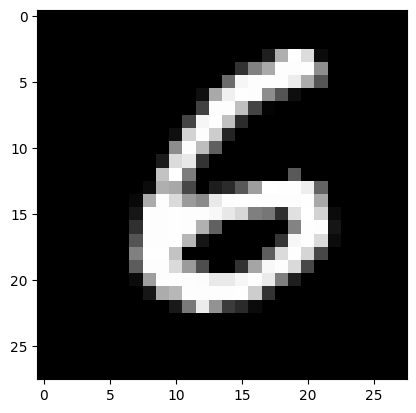

In [19]:
test_prediction(9, W1, b1, W2, b2)

In [20]:
test_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_val)

np.float64(0.896)